In [2]:
from PIL import Image
import numpy as np
import os
import timeit
from shutil import copyfile
import time
from collections import Counter

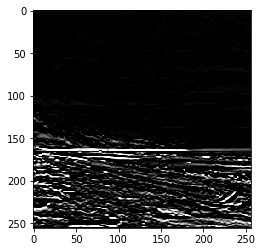

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('small/test/ADE_val_00000113.jpg')

plt.imshow(image)

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

In [129]:
??cv2.filter2D

Docstring:
filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
.   @brief Convolves an image with the kernel.
.   
.   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
.   the aperture is partially outside the image, the function interpolates outlier pixel values
.   according to the specified border mode.
.   
.   The function does actually compute correlation, not the convolution:
.   
.   \f[\texttt{dst} (x,y) =  \sum _{ \stackrel{0\leq x' < \texttt{kernel.cols},}{0\leq y' < \texttt{kernel.rows}} }  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
.   
.   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
.   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
.   anchor.y - 1)`.
.   
.   The function uses the DFT-based algorithm in case of sufficiently large kernels (~`11 x 11`

In [68]:
right_sobel = np.array([-1,0,1,
                        -2,0,2,
                        -1,0,1]).reshape(3,3)
left_sobel = np.array([1,0,-1,
                       2,0,-2,
                       1,0,-1]).reshape(3,3)
bottom_sobel = np.array([-1,-2,-1,
                          0,0,0,
                          1,2,1]).reshape(3,3)

In [75]:
right_sobel

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [124]:
im = Image.open('small/test/ADE_val_00000113.jpg').convert('L')
grid = np.array(im)
output_grid = grid.copy()

In [125]:
kernel = right_sobel

for r in range(253):
    for c in range(253):
        face = np.array([grid[r][c],grid[r][c+1],grid[r][c+2],
                         grid[r+1][c],grid[r+1][c+1],grid[r+1][c+2],
                         grid[r+2][c],grid[r+2][c+1],grid[r+2][c+2]]).reshape(3,3)
        output_grid[r][c] = int(np.sum(face*kernel))

In [126]:
output_grid

array([[222, 250,   9, ..., 224, 226, 232],
       [221, 251,   8, ..., 216, 219, 224],
       [220, 252,   9, ..., 216, 219, 225],
       ...,
       [163, 167, 160, ..., 111, 108, 101],
       [154, 159, 154, ..., 115, 115, 113],
       [168, 159, 144, ..., 118, 124, 128]], dtype=uint8)

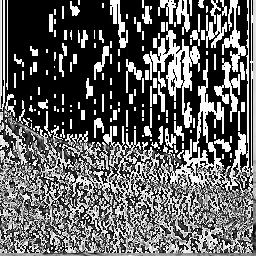

In [127]:
Image.fromarray(output_grid)

In [82]:
Image.fromarray([[grid[i][u] for i in range(0,3)] for u in range(0,3)])

AttributeError: 'list' object has no attribute '__array_interface__'

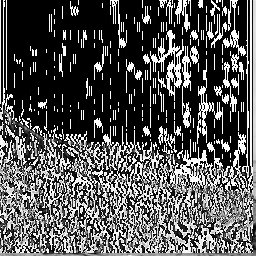

In [71]:
Image.fromarray(output_grid)

ValueError: operands could not be broadcast together with shapes (3,3) (256,256) 